# Importing the libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, RocCurveDisplay, f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV



# Importing the dataset

In [201]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')


# Data exploataion

 **Understanding the data**


 Process of analysing data to better understand it; it can also be used to prepare data for pre processing modelling.

In [202]:
dataset.head()
#check the first 5 row of the data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [203]:
#check the type of data in th columns
dataset.dtypes


,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [204]:
dataset.shape
# this return the number of rows and columns  in the dataset

(5110, 12)

In [205]:
dataset.describe()
#this functuon will return count, mean, standard deviation, minimum and maximum values and the quantiles of the data of the numerical values

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 **checking all unique values**

In [206]:
dataset.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


**Checking outliers**
From the output above i can tell that bmi and avg_glucose_level have a large number of uniqure values  value. thise feature will be needed to check for outliers`

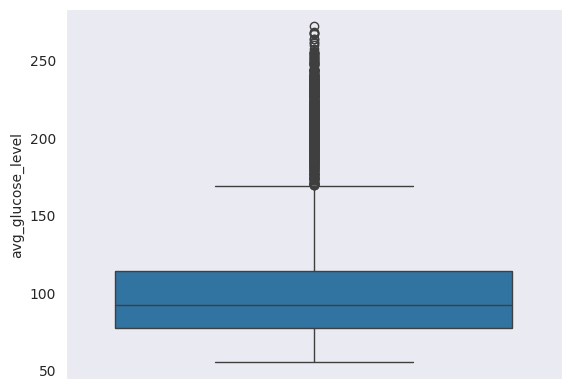

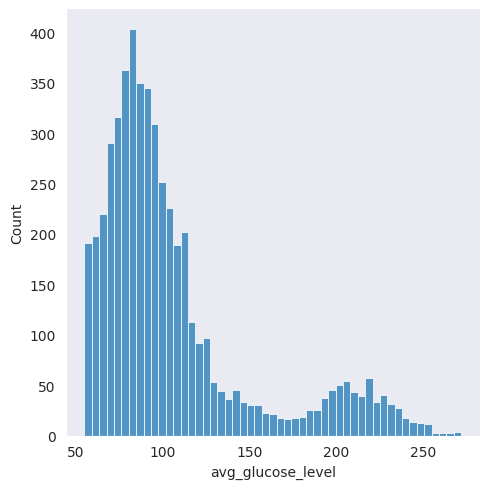

In [207]:

# Box plot
sns.boxplot(dataset.avg_glucose_level)

# Distribution plot
sns.displot(dataset.avg_glucose_level)

**Investigate into Age, Average Glucose Level, BMI**


Further investigate into Age, Average Glucose Level, BMI to spot for any corelation

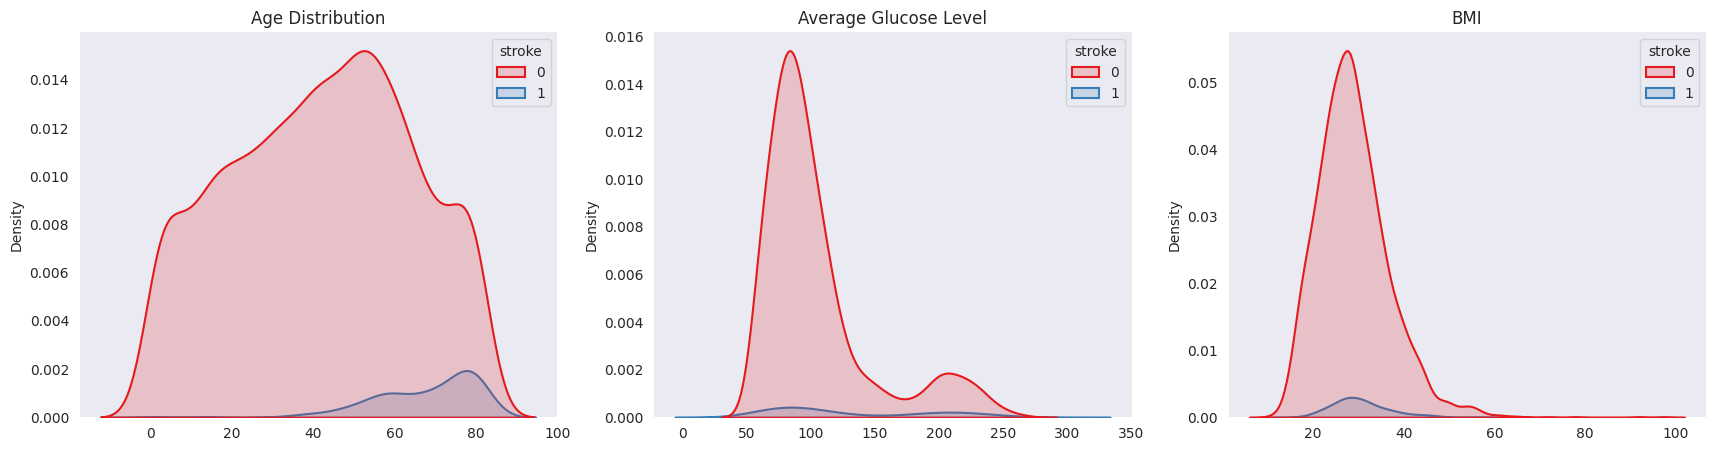

In [208]:

sns.set_style('dark')

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x='age', alpha=0.2, palette="Set1", label='Smoker', data =dataset, fill=True, linewidth=1.5, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=dataset['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x='bmi', alpha=0.2, palette="Set1", label='BMI',data = dataset, shade=True, linewidth=1.5, fill=True, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

## Cleaning the data

**checking for null value**

In [209]:
dataset.isnull().sum()
#this function will retun columns and it null sum od it null value

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [210]:
len(dataset.bmi)

5110

**Cleaning the data**

In [211]:
#dro all bmi rows with null values
dataset = dataset.dropna()


In [212]:
#drop the id colums
dataset = dataset.drop('id', axis=1)
#drop the other in the gender
dataset.drop(dataset.loc[dataset['gender']=='Other'].index, inplace=True)
dataset.age = dataset.age.round().astype('int')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Relationship analysis

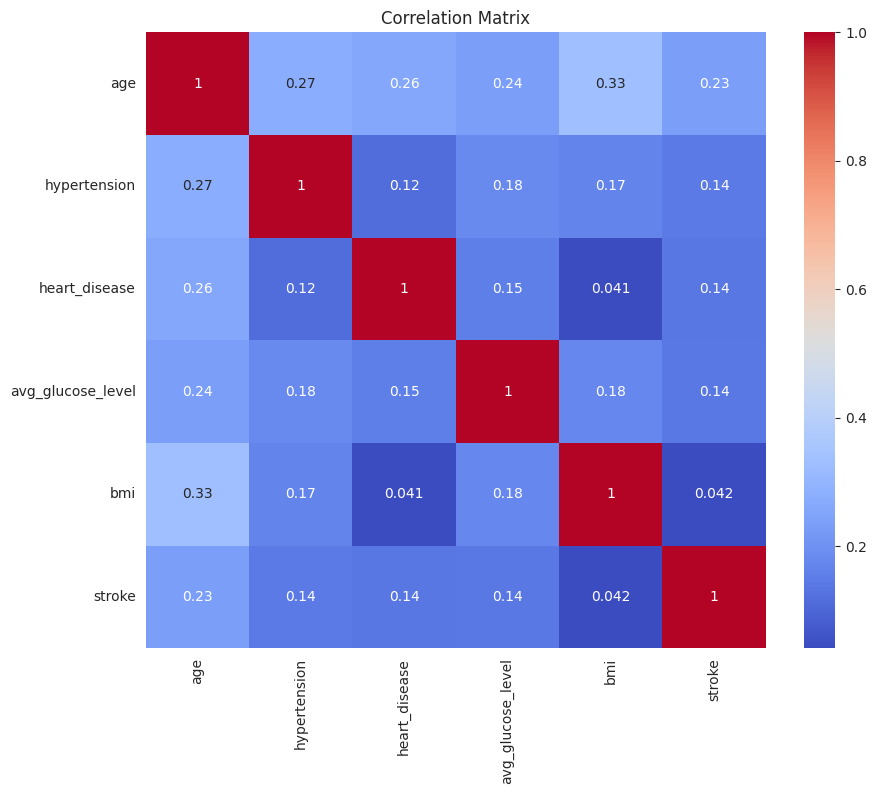

In [213]:
# Select only numeric columns for the correlation matrix
numeric_dataset = dataset.select_dtypes(include=[np.number])
corre = numeric_dataset.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

 **Visualising features**

 Start making some assumptions

1.   Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke  
2.    Gender, hypertension and any history of heart diseases effect the stroke probability¶



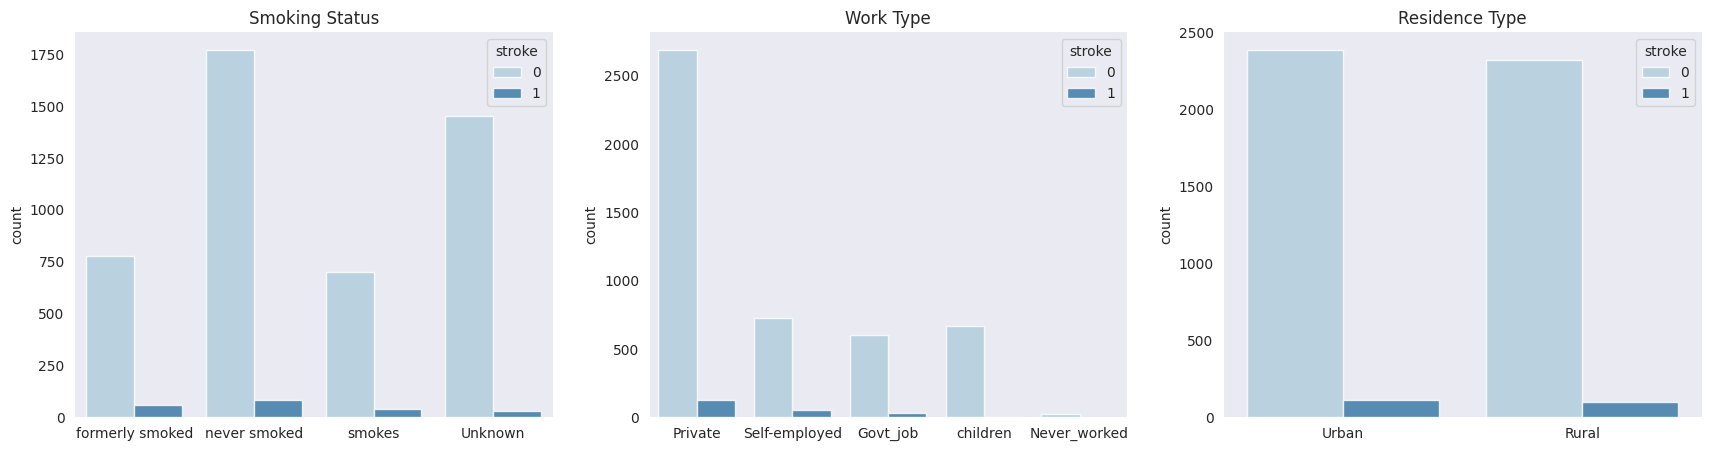

In [214]:
#1 Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='smoking_status', alpha=0.8, palette="Paired",hue='stroke', data = dataset );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x='work_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x='Residence_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');



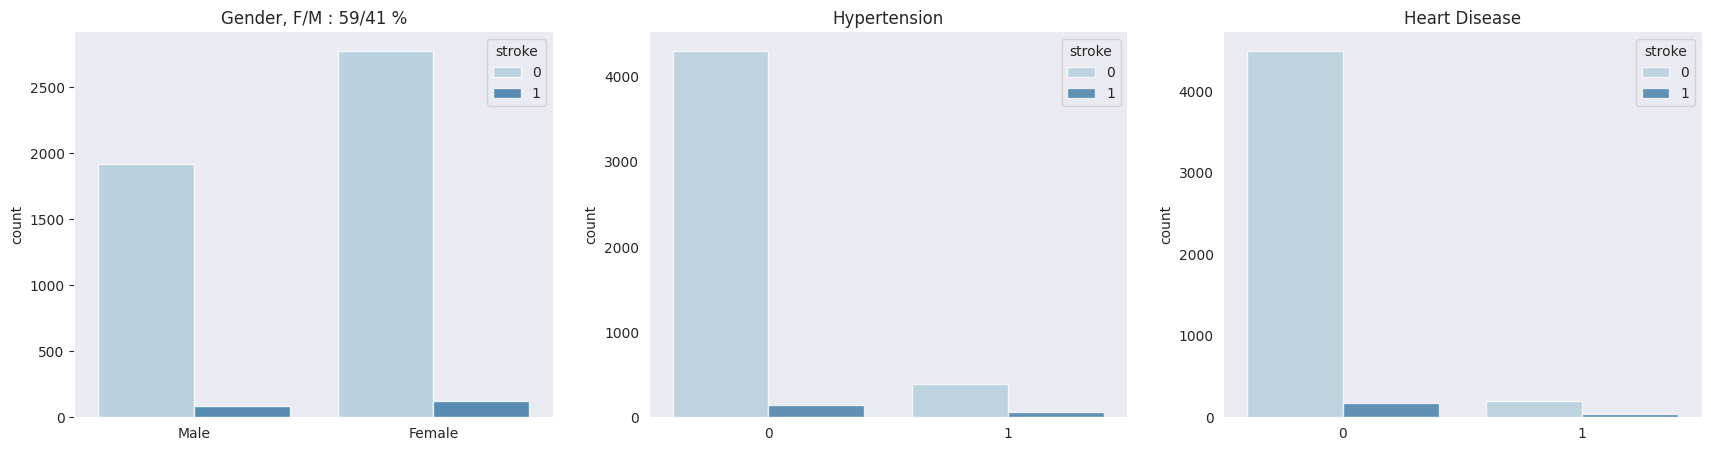

In [215]:
# 2 Gender, hypertension and any history of heart diseases effect the stroke probability¶
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='gender', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x='hypertension', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x='heart_disease', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

**check the ratio of the two to see the imbalances**

In [216]:

print("Patient that dont stroke ratio: " + str(dataset.stroke.value_counts()[1]/len(dataset)))
print("Patient that have stroke ratio : " + str(dataset.stroke.value_counts()[0]/len(dataset)))
dataset.stroke.value_counts()
dataset.stroke.value_counts()

Patient that dont stroke ratio: 0.04258353708231459
Patient that have stroke ratio : 0.9574164629176855


,count
stroke,
0,4699
1,209


Visualise age distribution


<Figure size 2100x500 with 0 Axes>

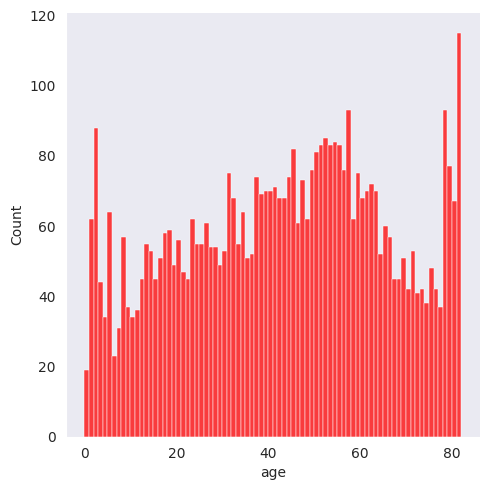

In [217]:
plt.figure(figsize=(21,5))
sns.displot(dataset['age'], bins=max(dataset['age']),color='red', kde=False);

**Visualise age and stroke **
this is need to check the ccorrelation betwen the row varibale


<Figure size 1000x500 with 0 Axes>

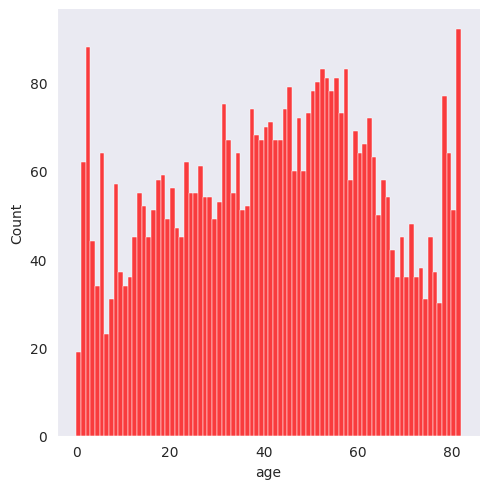

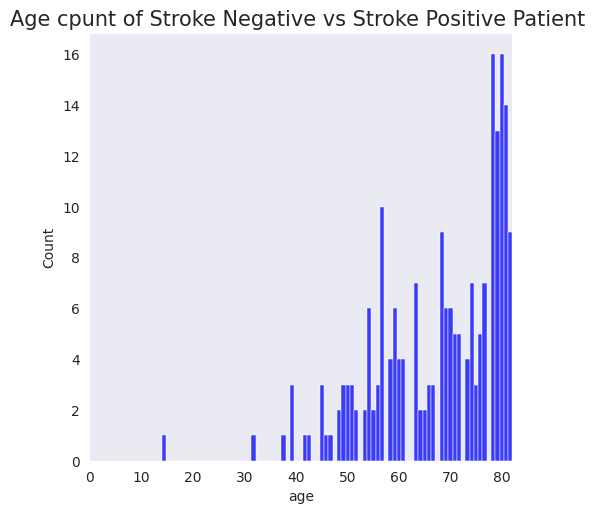

In [218]:
plt.figure(figsize=(10, 5))

sns.displot(dataset[dataset['stroke'] == 0]["age"], bins=max(dataset['age']), color='red',kde=False)
sns.displot(dataset[dataset['stroke'] == 1]["age"], bins=max(dataset['age']), color='blue', kde=False)

plt.title('Age cpunt of Stroke Negative vs Stroke Positive Patient ', fontsize=15)
plt.xlim([min(dataset['age']),max(dataset['age'])])
plt.show()

# Data Preprocessing

Slicing the dataset into dependent and independent variable

In [219]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data with label encoder


label encoding is used for datapoint with only two values

In [220]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])


### One Hot Encoding the "Work_type and  "somke_status" column" column

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',
OneHotEncoder(), [5,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Note** Onehotencoder is used one  datapoint with only two or more values which have numeric order

In [222]:
X

array([[0.0, 0.0, 1.0, ..., 1, 228.69, 36.6],
       [0.0, 0.0, 1.0, ..., 0, 105.92, 32.5],
       [0.0, 0.0, 1.0, ..., 1, 171.23, 34.4],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 0.0, 1.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [223]:
X.shape

(4908, 17)

In [224]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)


### Feature Selection

In [225]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

X = fit.transform(X)

[1.995e+00 2.200e+01 6.567e+00 1.029e+02 6.387e+02 2.916e+02 1.248e+02
 5.226e+00 1.280e+01 6.455e+00 3.019e+04 5.379e+02 4.506e+02 1.943e+02
 3.284e-02 1.789e+04 1.248e+02]


In [226]:
#patient to be used for preditction
patient = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]

## Splitting dateset

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.2, random_state = 1)



**Handling imbalances data**

Verifying of  oversampling

In [228]:
X_test

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 7.455e-01, 6.187e+01,
        2.971e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.977e+02,
        2.840e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 9.913e+01,
        2.280e+01],
       ...,
       [0.000e+00, 0.000e+00, 6.268e-01, ..., 0.000e+00, 9.524e+01,
        2.610e+01],
       [0.000e+00, 0.000e+00, 8.788e-01, ..., 1.000e+00, 2.047e+02,
        3.064e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.165e-03, 1.049e+02,
        3.194e+01]])

In [229]:
X_train

array([[  0.327,   0.   ,   0.   , ...,   1.   , 198.12 ,  24.424],
       [  0.   ,   0.   ,   0.444, ...,   0.556, 233.579,  46.014],
       [  0.   ,   0.   ,   1.   , ...,   0.668, 239.751,  26.701],
       ...,
       [  0.   ,   0.   ,   1.   , ...,   0.   ,  77.42 ,  26.1  ],
       [  0.31 ,   0.   ,   0.   , ...,   0.31 ,  79.823,  28.618],
       [  1.   ,   0.   ,   0.   , ...,   0.   ,  94.61 ,  28.4  ]])

In [230]:
print(y_test)

[1 0 0 ... 1 1 1]


In [231]:
print(y_train)

[1 1 1 ... 0 1 0]


## Feature Scaling

In [232]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [168]:
print(X_test)

[[-0.432 -0.05   0.891 ...  0.198  1.369  1.002]
 [-0.432 -0.05   0.891 ...  1.071  1.438 -0.158]
 [-0.432 -0.05  -1.313 ...  1.071 -0.36  -0.98 ]
 ...
 [ 0.768 -0.05  -1.313 ...  1.071 -0.751 -0.016]
 [-0.432 -0.05   0.891 ... -0.349 -0.801  0.147]
 [-0.432 -0.05   0.891 ... -1.029 -0.617  1.085]]


# Helper Functions

**Prediction Function**

In [169]:
#this function will be use to make predictions after models is train
def prediction(classifier, X=X_test):
  y_pred = classifier.predict(X)

  print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
  print()

     #this condition check if model accuracy is below 90% if so it apply tunning using gridsearch
  if accuracy_score(y_test, y_pred) < 0.90:
    print("MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED ")
    grid_search_tunning(classifier,parameters)

  print()
  # Predicting the Test set results
  print("Predicting the Test set results ")
  #matching all predtiction with true values this help eliminate overfiting
  print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print()
  print(f" Predicting for: ")
  #get the patient that will be used to make prediction from dataset
  print(dataset[:1])
  print(f" y_predicted :{classifier.predict(sc.transform([patient]))}")
  print("==================================================================")
  print()





**Function for training models**

In [170]:
def trainmodels(classifier, X_train, y_train):

  #this function takes the untrain models, train it then return the train model

  classifier.fit(X_train, y_train)
  #calling the prediction function to make predictions on the train models
  prediction(classifier)
  #making confusion matrix
  makin_confusion_matrix(classifier)


  #this function return nthe train model.
  return classifier


**Making the Confusion Matrix Function**

In [171]:
def makin_confusion_matrix(classifier,X=X_test):
  #this function takes train model and make matrix on it
  y_pred = classifier.predict(X)
  cm = confusion_matrix(y_test, y_pred )
  classifier_report=classification_report(y_test, y_pred )
  print()
  print("Making the Confusion Matrix")
  print("**************************")
  print("Accuracy: {:.2f} %".format(accuracy_score(y_test,y_pred)*100))
  print(cm)
  print("")
  print("")
  print("Accuracy repeort")
  print(classifier_report)





**Plot Confusion matrix function **

In [172]:
def plot_confusion_matrix(classifier, X=X_test):
  y_pred = classifier.predict(X)
  cm_map = sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='OrRd', fmt='g')
  plt.show(cm_map)

**Function for app K-Fold cross validation**

In [173]:
def k_fold_cross_validation(classifier, X_train, y_train, cv:int):
  print("****************************************************")
  accuracies = cross_val_score(estimator =  classifier, X = X_train, y = y_train, cv = 15)
  print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



**Function for Grid search fine tuning**

**Note:** tunning is only apply to models with accuracy below 90%

In [174]:
def grid_search_tunning (classifier,parameters):
  grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, verbose=1, cv=10, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_
  print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
  print("Best Parameters:", best_parameters)

# Classifications Modeling

## Logistic Regression

In [175]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
    'class_weight': ['balanced']}

LR = trainmodels(LogisticRegression(class_weight='balanced'), X_train, y_train)


Accuracy: 78.09 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Accuracy: 77.81 %
Best Parameters: {'C': 0.009, 'class_weight': 'balanced', 'penalty': 'l2'}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 78.09 %
[[695 235]
 [177 773]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       930
           1       0.77      0.81      0.79       950

    accuracy                           0.78      1880
   macro avg       0.78      0.78    

**Tunning using GridSearch**

**Note: gridsearch is only applied on low preforming models**

## Random Forest

**Training the Random Forest Classification model on the Training set**

In [176]:
RF= trainmodels(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),X_train, y_train)

Accuracy: 97.23 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.23 %
[[917  13]
 [ 39 911]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       930
           1       0.99      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## Decision Tree Classification

**Training the Random Forest Classification model on the Training set**

In [177]:
parameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
DTC= trainmodels(DecisionTreeClassifier(criterion = 'entropy'),X_train,y_train)

Accuracy: 95.05 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 95.05 %
[[879  51]
 [ 42 908]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       930
           1       0.95      0.96      0.95       950

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



## Naive Bayes

**Training the Naive Bayes model on the Training set**

In [178]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)
}
NB =trainmodels(GaussianNB(),X_train,y_train)

Accuracy: 62.02 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy: 71.95 %
Best Parameters: {'var_smoothing': 0.12328467394420659}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 62.02 %
[[219 711]
 [  3 947]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.99      0.24      0.38       930
           1       0.57      1.00      0.73       950

    accuracy                           0.62      1880
   macro avg       0.78      0.62      0.55      1880


**Tunning using GridSearch**

## K-Nearest Neighbors (K-NN)

**Training the K-NN model on the Training set**

In [179]:
KNN = trainmodels(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),X_train,y_train)

Accuracy: 93.67 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.67 %
[[821 109]
 [ 10 940]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       930
           1       0.90      0.99      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



## Kernel SVM

**Training the Kernel SVM model on the Training set**

In [180]:
KSVM=trainmodels(SVC(kernel = 'rbf', random_state = 0), X_train,y_train)

Accuracy: 93.24 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.24 %
[[890  40]
 [ 87 863]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       930
           1       0.96      0.91      0.93       950

    accuracy                           0.93      1880
   macro avg       0.93      0.93      0.93      1880
weighted avg       0.93      0.93      0.93      1880



# Gradient boosting Classifications modeling

## Xgboost

### Training xgboost

In [181]:
XGB = trainmodels(XGBClassifier(),X_train,y_train)

Accuracy: 96.60 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 96.60 %
[[910  20]
 [ 44 906]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       930
           1       0.98      0.95      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## CatBoost

###Training Catboots

In [182]:
CAT =trainmodels(CatBoostClassifier(),X_train, y_train)

Learning rate set to 0.02438
0:	learn: 0.6633505	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6364006	total: 18.6ms	remaining: 9.26s
2:	learn: 0.6085691	total: 24.6ms	remaining: 8.18s
3:	learn: 0.5850402	total: 33.3ms	remaining: 8.28s
4:	learn: 0.5601601	total: 39.5ms	remaining: 7.87s
5:	learn: 0.5401723	total: 45.8ms	remaining: 7.58s
6:	learn: 0.5162018	total: 51.8ms	remaining: 7.35s
7:	learn: 0.4961682	total: 58.1ms	remaining: 7.21s
8:	learn: 0.4742147	total: 64.6ms	remaining: 7.12s
9:	learn: 0.4586099	total: 70.7ms	remaining: 7s
10:	learn: 0.4432028	total: 76.9ms	remaining: 6.91s
11:	learn: 0.4301288	total: 83.4ms	remaining: 6.87s
12:	learn: 0.4213653	total: 95.5ms	remaining: 7.25s
13:	learn: 0.4043346	total: 103ms	remaining: 7.24s
14:	learn: 0.3891230	total: 109ms	remaining: 7.18s
15:	learn: 0.3778173	total: 115ms	remaining: 7.1s
16:	learn: 0.3679672	total: 122ms	remaining: 7.03s
17:	learn: 0.3579583	total: 135ms	remaining: 7.38s
18:	learn: 0.3462472	total: 142ms	remaining: 7.31s
19:

**Predicting the Test set results**

---




# Deep Learning Classifications Modeling

In [183]:
import tensorflow as tf

## Artificial Neural Network

### Initialising the ANN

In [184]:
ann = tf.keras.models.Sequential()

###Adding the input layer and the first hidden layer

In [185]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

###Adding the second hidden layer

In [186]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [187]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Comapeling ANN

In [188]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###Training the ANN

In [189]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6211 - loss: 0.6566
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4603
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4188
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8342 - loss: 0.3808
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8364 - loss: 0.3670
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3567
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8549 - loss: 0.3325
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3192
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8656 - loss: 0.3076
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.2878
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.2691
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

**Predict stroke risk factor for a patient**

In [190]:

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]]))> 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[ True]]


In [191]:
print(" possibility")

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]])))

 possibility
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.996]]


**Predicting the Test set**

In [192]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

[[876  54]
 [ 67 883]]
0.9356382978723404


Text(0.5, 1.0, 'Artificial Neural Network')

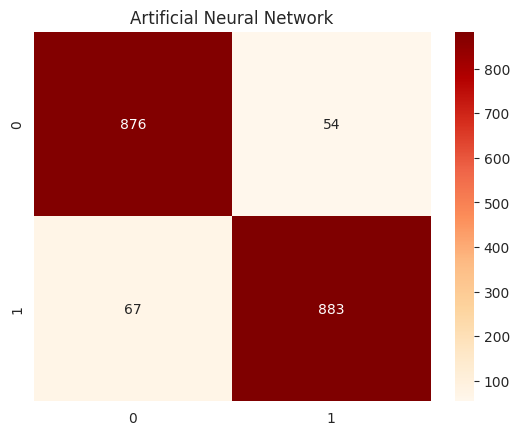

In [193]:
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)
ann_report=classification_report(y_test, y_pred_ann)
print(accuracy_score(y_test, y_pred_ann))
sns.heatmap(confusion_matrix(y_test, y_pred_ann),annot=True,cmap='OrRd', fmt='g' )
plt.title('Artificial Neural Network')

In [194]:
print(ann_report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       930
           1       0.94      0.93      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



# Dictionary of Trained Models

In [199]:
models = { "Logistic Regression":LR, " Random Forest":RF, "Decision Tree Classification":DTC,
        "Naive Bayes":NB ,"K-Nearest Neighbors (K-NN)":KNN,"Kernel SVM":KSVM,
       "XGBboots" :XGB, "Catboost": CAT }


# Applying k-Fold Cross Validation on all models

In [196]:
for names,model, in models.items():
  print(f" Cross validation results {names}")
  k_fold_cross_validation(model,X_train,y_train,15)
  print()

Streaming output truncated to the last 5000 lines.
7:	learn: 0.5037189	total: 48.6ms	remaining: 6.03s
8:	learn: 0.4848877	total: 54.4ms	remaining: 5.99s
9:	learn: 0.4650695	total: 67.6ms	remaining: 6.7s
10:	learn: 0.4504529	total: 74.3ms	remaining: 6.68s
11:	learn: 0.4391612	total: 80.3ms	remaining: 6.61s
12:	learn: 0.4300131	total: 86.2ms	remaining: 6.54s
13:	learn: 0.4172430	total: 92.2ms	remaining: 6.5s
14:	learn: 0.4033951	total: 98.3ms	remaining: 6.46s
15:	learn: 0.3933110	total: 104ms	remaining: 6.41s
16:	learn: 0.3838410	total: 110ms	remaining: 6.37s
17:	learn: 0.3731365	total: 116ms	remaining: 6.33s
18:	learn: 0.3604962	total: 122ms	remaining: 6.3s
19:	learn: 0.3480275	total: 129ms	remaining: 6.3s
20:	learn: 0.3395311	total: 135ms	remaining: 6.29s
21:	learn: 0.3305384	total: 141ms	remaining: 6.26s
22:	learn: 0.3198331	total: 147ms	remaining: 6.24s
23:	learn: 0.3117012	total: 154ms	remaining: 6.25s
24:	learn: 0.3029644	total: 160ms	remaining: 6.23s
25:	learn: 0.2957070	total: 16

# Evaluating and visualise results.

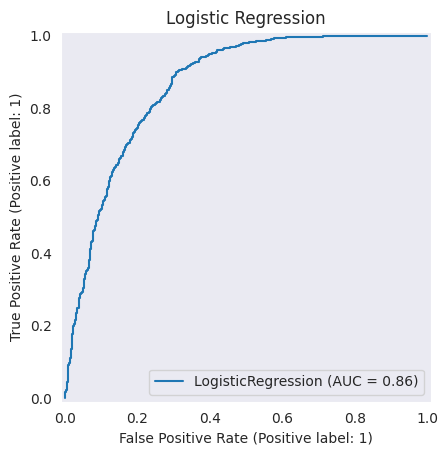

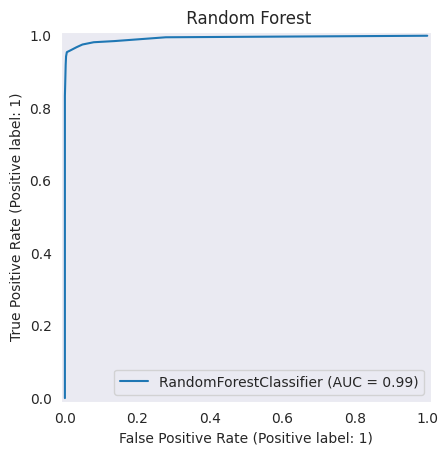

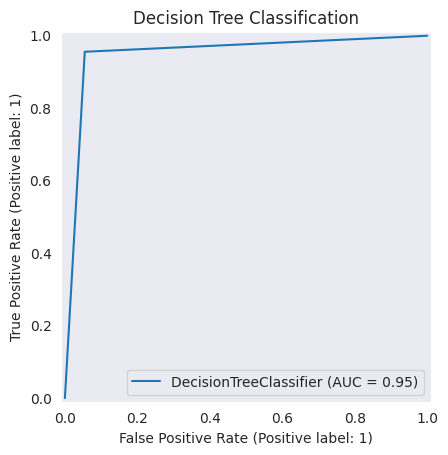

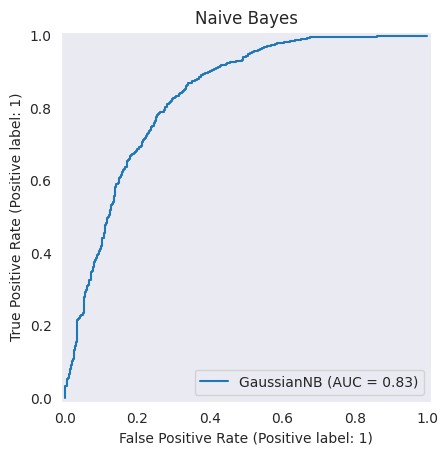

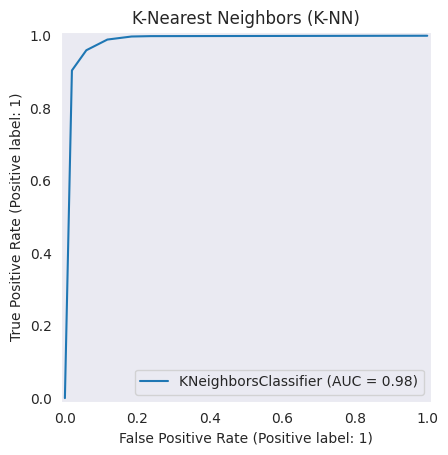

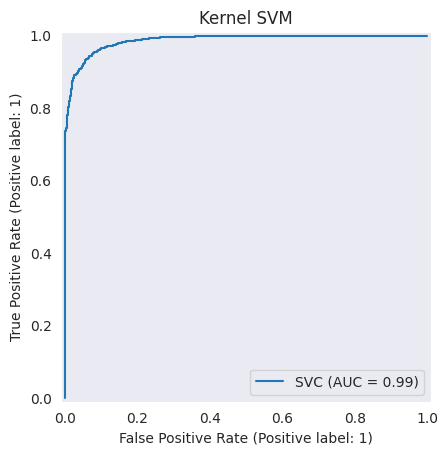

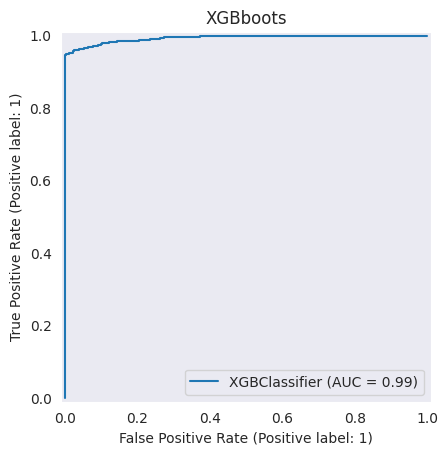

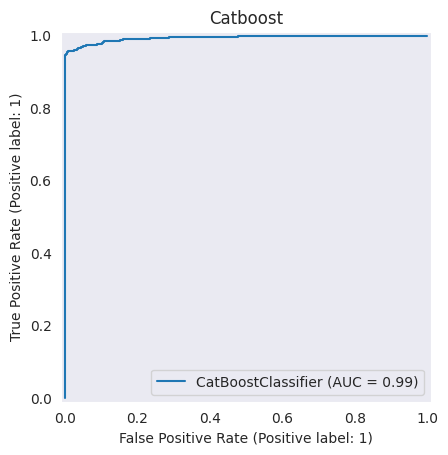

In [197]:
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(name)
    plt.show()

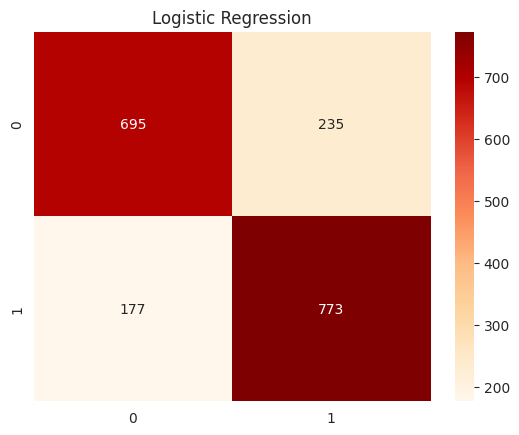

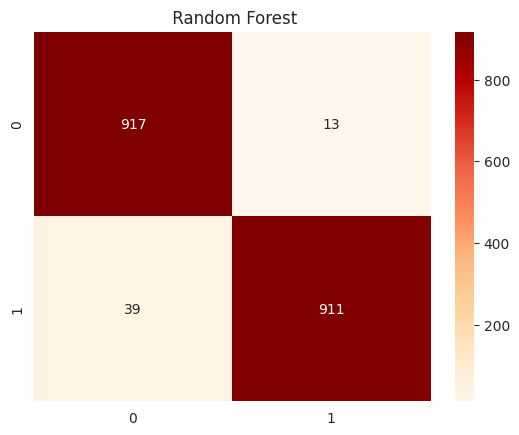

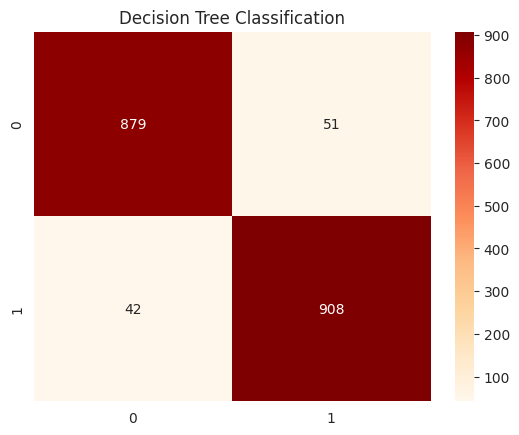

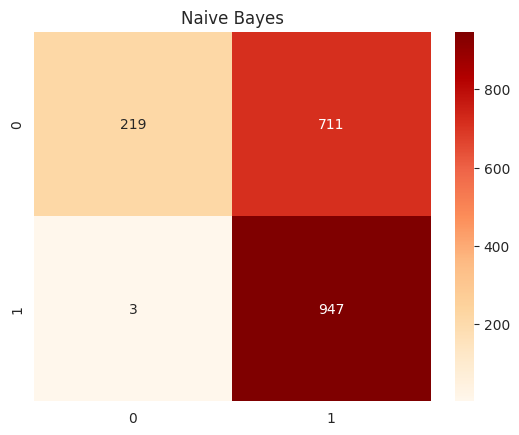

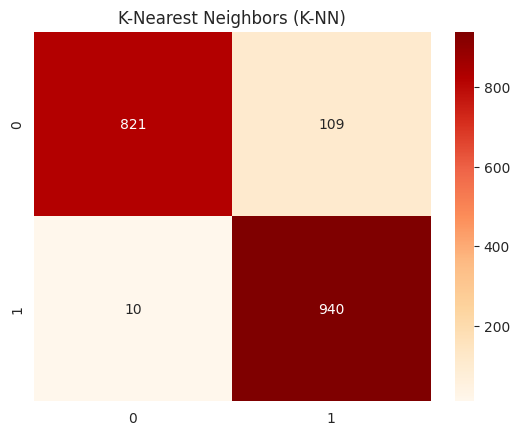

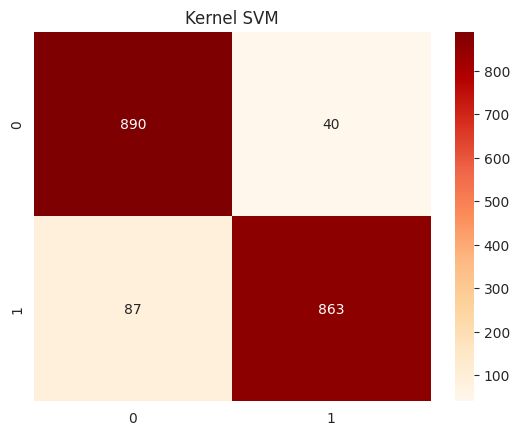

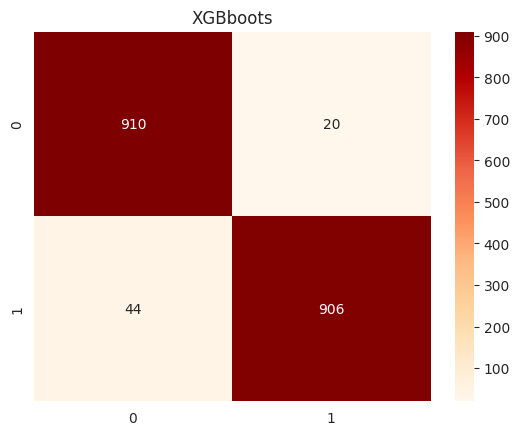

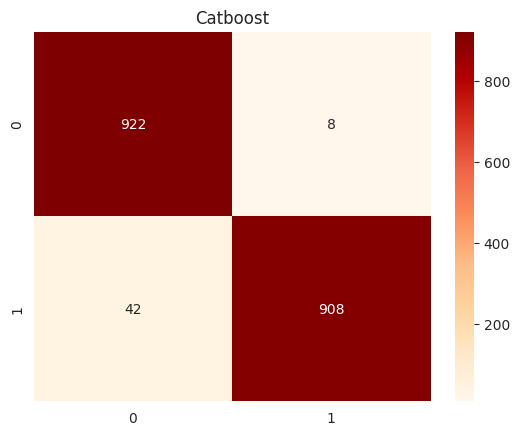

In [198]:
for names,model, in models.items():
  plt.title(names)
  plot_confusion_matrix(model)
